Rata-rata PSNR image gaussian noise = 27.754745104602062
Rata-rata PSNR image dengan median filter = 27.684199493520804
Rata-rata PSNR image gaussian filter = 27.655914730486938
-0.02828476303386651


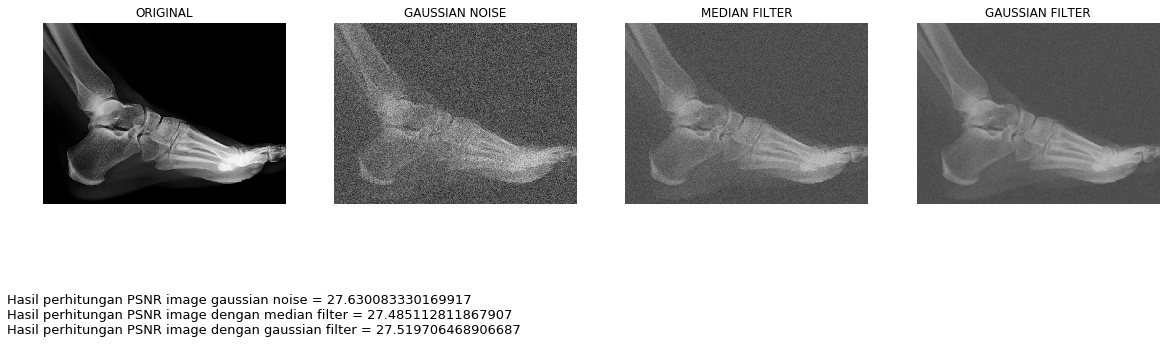

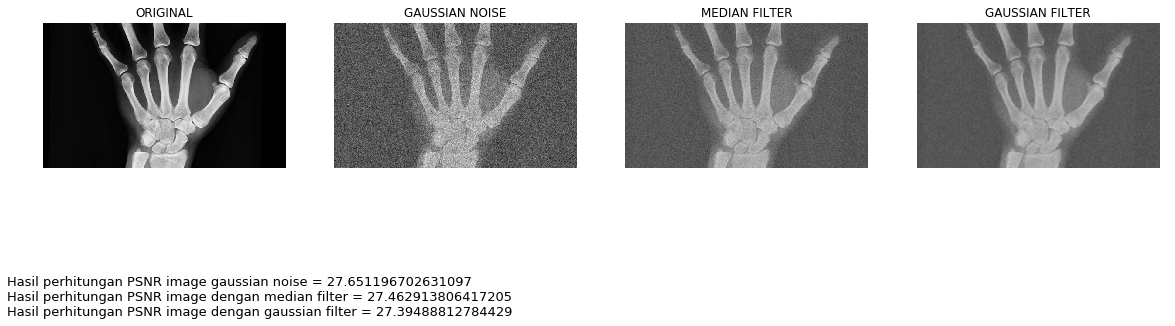

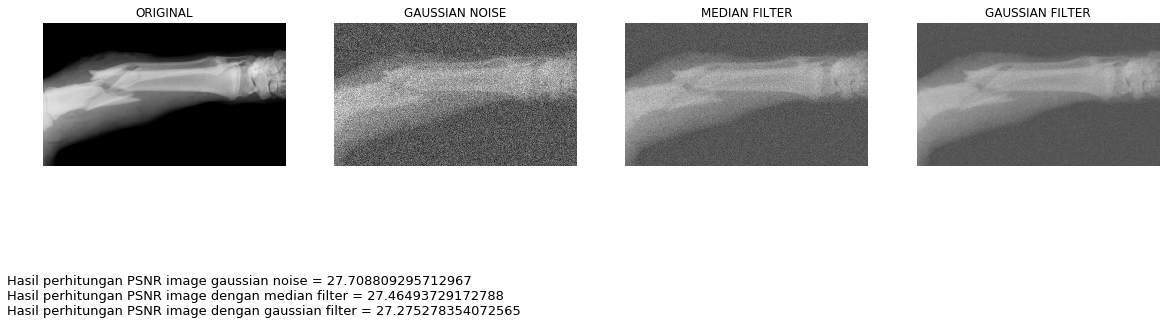

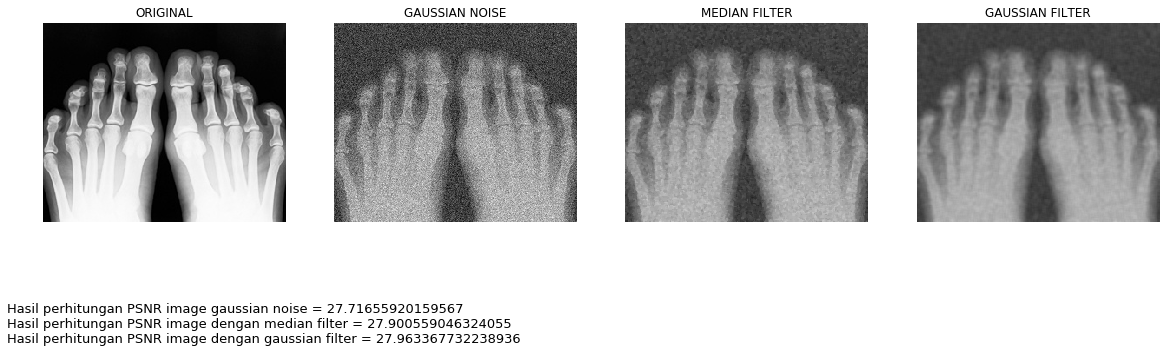

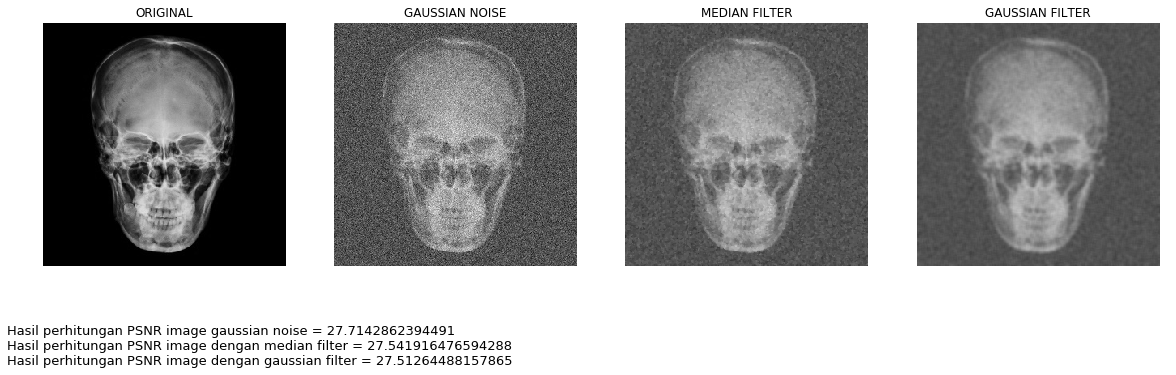

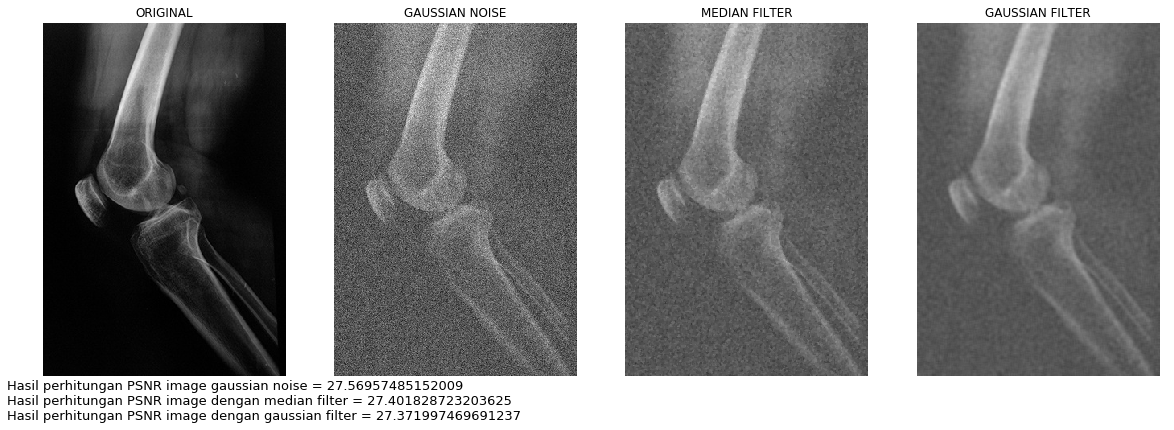

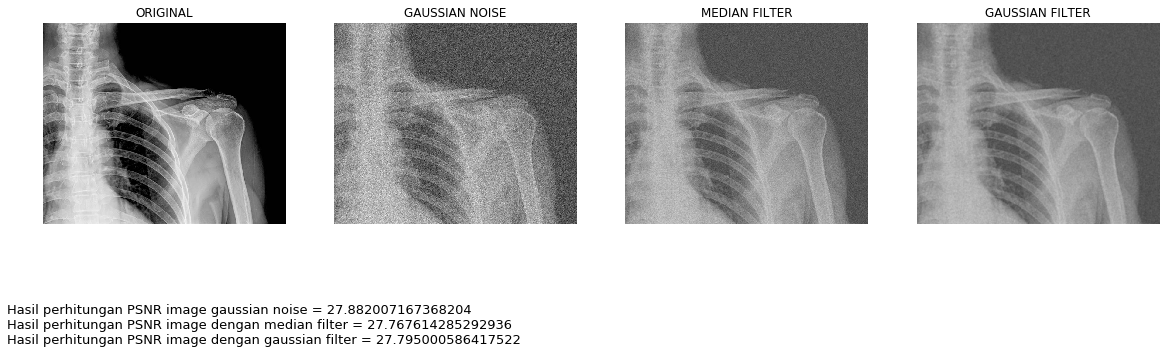

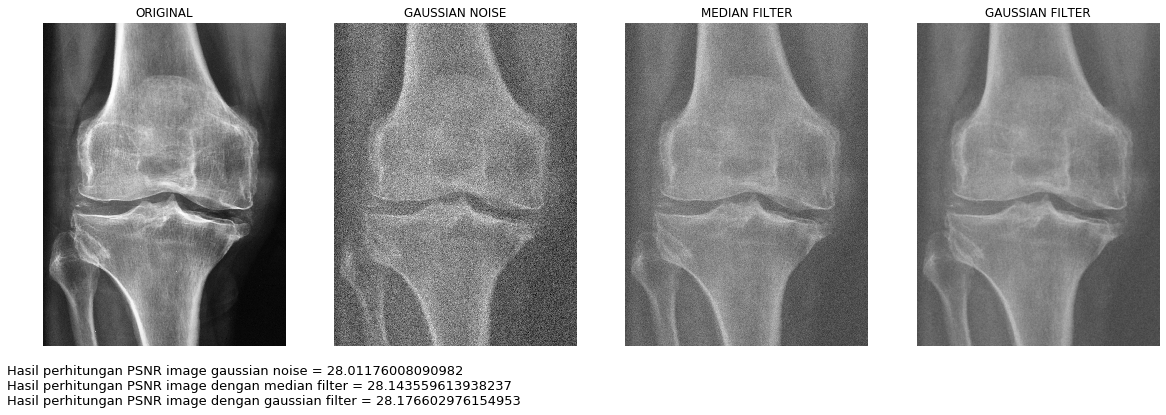

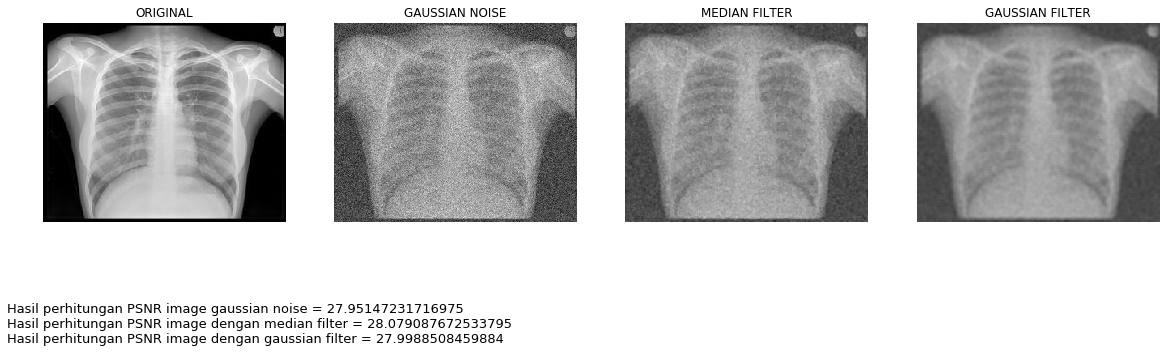

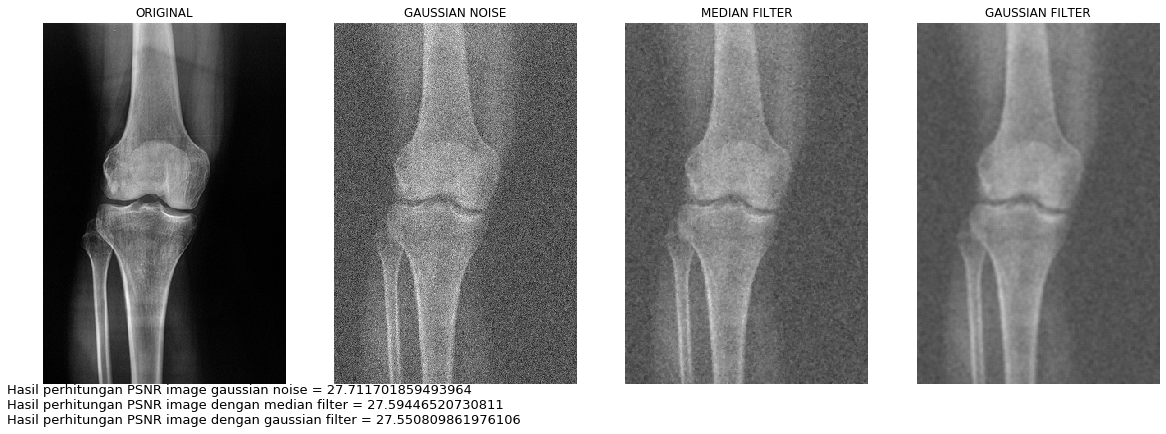

In [35]:
import matplotlib.pyplot as plt
import matplotlib.cm
import cv2
import numpy as np
import math
from PIL import Image, ImageFilter
from skimage import img_as_float
from skimage.util import random_noise
from skimage.io import imread, imsave
import matplotlib.image as mpimg

img1 = []
img1.extend(["dataset/xray.jpg", "dataset/xray2.jpg", "dataset/xray3.jpg", "dataset/xray4.jpg", "dataset/xray5.jpg", "dataset/xray6.jpg", "dataset/xray7.jpg", "dataset/xray8.jpg", "dataset/xray9.jpg", "dataset/xray10.jpg"])
img2 = []
img2.extend(["output/xray_greyscale.jpg", "output/xray_greyscale2.jpg", "output/xray_greyscale3.jpg", "output/xray_greyscale4.jpg", "output/xray_greyscale5.jpg", "output/xray_greyscale6.jpg", "output/xray_greyscale7.jpg", "output/xray_greyscale8.jpg", "output/xray_greyscale9.jpg", "output/xray_greyscale10.jpg"])
img3 = []
img3.extend(["output/xray_noisy.jpg", "output/xray_noisy2.jpg", "output/xray_noisy3.jpg", "output/xray_noisy4.jpg", "output/xray_noisy5.jpg", "output/xray_noisy6.jpg", "output/xray_noisy7.jpg", "output/xray_noisy8.jpg", "output/xray_noisy9.jpg", "output/xray_noisy10.jpg"])
img4 = []
img4.extend(["output/xray_median.jpg", "output/xray_median2.jpg", "output/xray_median3.jpg", "output/xray_median4.jpg", "output/xray_median5.jpg", "output/xray_median6.jpg", "output/xray_median7.jpg", "output/xray_median8.jpg", "output/xray_median9.jpg", "output/xray_median10.jpg"])
img5 = []
img5.extend(["output/xray_gaussian.jpg", "output/xray_gaussian2.jpg", "output/xray_gaussian3.jpg", "output/xray_gaussian4.jpg", "output/xray_gaussian5.jpg", "output/xray_gaussian6.jpg", "output/xray_gaussian7.jpg", "output/xray_gaussian8.jpg", "output/xray_gaussian9.jpg", "output/xray_gaussian10.jpg"])

def psnr(img1, img2):
    mse = np.mean((img1-img2)**2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

psnr_noisy = [0 for x in range(len(img1))]
psnr_median = [0 for x in range(len(img1))]
psnr_gaussian = [0 for x in range(len(img1))]

for i in range(len(img1)):
    
    img_original = cv2.imread(img1[i],cv2.IMREAD_UNCHANGED)
    img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)

    #Greyscale Image
    img_greyscale = cv2.cvtColor(img_original, cv2.COLOR_RGB2GRAY)
    cv2.imwrite(img2[i], img_greyscale)


    #Add Gaussian Noise
    img_greyscale = cv2.imread(img2[i])
    mean = 100
    var = 100
    sigma = var ** 0.8
    gaussian = np.random.normal(mean, sigma, (img_greyscale.shape[0],img_greyscale.shape[1])) #  np.zeros((224, 224), np.float32)

    img_noisy = np.zeros(img_greyscale.shape, np.float32)

    if len(img_greyscale.shape) == 2:
        img_noisy = img_greyscale + gaussian
    else:
        img_noisy[:, :, 0] = img_greyscale[:, :, 0] + gaussian
        img_noisy[:, :, 1] = img_greyscale[:, :, 1] + gaussian
        img_noisy[:, :, 2] = img_greyscale[:, :, 2] + gaussian

    cv2.normalize(img_noisy, img_noisy, 0, 255, cv2.NORM_MINMAX, dtype=-1)
    img_noisy = img_noisy.astype(np.uint8)

    cv2.imwrite( img3[i], img_noisy)

    #Use Median Filter
    im = Image.open(img3[i])
    img_median = im.filter(ImageFilter.MedianFilter);
    img_median.save(img4[i])

    #Use Gaussian Filter
    img_gaussian = cv2.GaussianBlur(img_noisy, (5, 5),5)
    cv2.imwrite(img5[i], img_gaussian)
    
    #Count PSNR
    psnr_noisy[i] = psnr(img_greyscale, img_noisy)
    psnr_median[i] = psnr(img_greyscale, img_median)
    psnr_gaussian[i] = psnr(img_greyscale, img_gaussian)
    
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 8))
    
    fig.text(0.1,0.12,
            'Hasil perhitungan PSNR image gaussian noise = %s\n'
            'Hasil perhitungan PSNR image dengan median filter = %s\n'
            'Hasil perhitungan PSNR image dengan gaussian filter = %s' 
            % (psnr_noisy[i],
               psnr_median[i],
               psnr_gaussian[i]),
            fontsize=13)
    
    ax1.imshow(img_greyscale)
    ax1.set_title("ORIGINAL")
    ax1.axis('off')

    ax2.imshow(img_noisy)
    ax2.set_title("GAUSSIAN NOISE")
    ax2.axis('off')

    ax3.imshow(img_median)
    ax3.set_title("MEDIAN FILTER")
    ax3.axis('off')

    ax4.imshow(img_gaussian)
    ax4.set_title("GAUSSIAN FILTER")
    ax4.axis('off')
    
print("Rata-rata PSNR image gaussian noise =" , (sum(psnr_noisy)/ len(psnr_noisy)))
print("Rata-rata PSNR image dengan median filter =" , (sum(psnr_median)/ len(psnr_median)))
print("Rata-rata PSNR image gaussian filter =" , (sum(psnr_gaussian)/ len(psnr_gaussian)))

print ((sum(psnr_gaussian)/ len(psnr_gaussian)) - (sum(psnr_median)/ len(psnr_median)))
# if ((sum(psnr_gaussian)/ len(psnr_gaussian)) - (sum(psnr_median)/ len(psnr_median))
#     print("gaussian")
# else :
#     print("median")